# compute standard spectrum

job file example:
```
WAVENUMBER 1
WAVE_CALIB 1
APOD 1.0
INIT_ANGLE 2.1
INIT_DY 8
INIT_DX 1.5
CALIBMAP /reductions2/sitelle/M95/SN1/laser/LASER_None.cam1.calibration_laser_map.fit.fits
TARGETX 667
TARGETY 1403
OBS data/ar41/18bq68/2325953o.fits
OBS data/ar41/18bq68/2325954o.fits
OBS data/ar41/18bq68/2325955o.fits
OBS data/ar41/18bq68/2325956o.fits
OBS data/ar41/18bq68/2325957o.fits
OBS data/ar41/18bq68/2325958o.fits
OBS data/ar41/18bq68/2325959o.fits
OBS data/ar41/18bq68/2325960o.fits
OBS data/ar41/18bq68/2325961o.fits
OBS data/ar41/18bq68/2325962o.fits
OBS data/ar41/18bq68/2325963o.fits
OBS data/ar41/18bq68/2325964o.fits
OBS data/ar41/18bq68/2325965o.fits
OBS data/ar41/18bq68/2325966o.fits
OBS data/ar41/18bq68/2325967o.fits
OBS data/ar41/18bq68/2325968o.fits
OBS data/ar41/18bq68/2325969o.fits
OBS data/ar41/18bq68/2325970o.fits
OBS data/ar41/18bq68/2325971o.fits
```

command:

```
orbs sitelle standard.job start --standard
```

## check outputs

The output file is for example `LDS749B_SN1.merged.standard_spectrum.hdf5`. It can be opened with the appropriate class `orb.fft.StandardSpectrum`

In [60]:
import orb.fft
import pylab as pl
import numpy as np
spec = orb.fft.StandardSpectrum('/reductions2/sitelle/M95/SN1/standard/LDS749B_SN1.merged.standard_spectrum.hdf5')

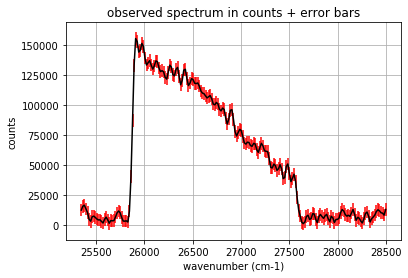

In [50]:
# its basic unit is in counts (not counts/s, which is useful to compute the expected noise)
spec.plot(c='black') # plot the spectrum
pl.errorbar(spec.axis.data, spec.data, yerr=spec.err, ls='none', c='red') # error bars are overplotted
pl.ylabel('counts')
pl.xlabel('wavenumber (cm-1)')
pl.title('observed spectrum in counts + error bars')
pl.grid()

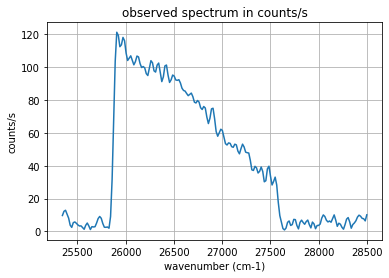

In [48]:
spec.to_counts_s().plot()
pl.ylabel('counts/s')
pl.xlabel('wavenumber (cm-1)')
pl.title('observed spectrum in counts/s')
pl.grid()

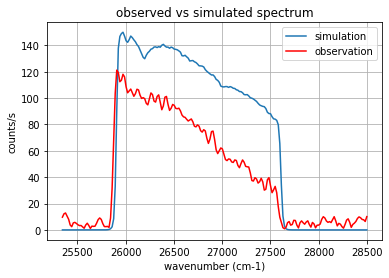

In [51]:
# the expected spectrum is computed from the standard spectrum, our knowledge of the instrument optics (sitelle + telescope) and the observation parameters. 
# It can be obtained with
spec.get_standard().plot(label='simulation')
# on which we can overplot the obtained spectrum
spec.to_counts_s().plot(c='red', label='observation')
pl.legend()
pl.ylabel('counts/s')
pl.xlabel('wavenumber (cm-1)')
pl.title('observed vs simulated spectrum')
pl.grid()

initial resolution of the observed spectrum:  697.3506476286766
resolution of the standard spectrum:  675.510682300033


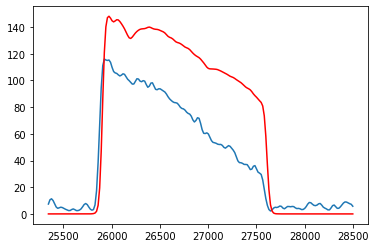

In [61]:
# for a better comparison both spectra should be set to the same resolution
print('initial resolution of the observed spectrum: ', spec.params.resolution)
print('resolution of the standard spectrum: ', np.median(spec.get_standard().params.resolution))
spec.to_counts_s().change_resolution(600).plot()
spec.get_standard().change_resolution(600).plot(c='red')

/home/thomas/Astro/Python/ORB/Orb/orb/fft.py:1150: RuntimeWarning: invalid value encountered in true_divide
  residual.data /= sim.data


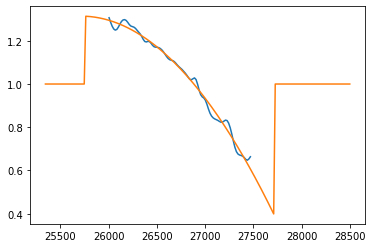

In [64]:
# the correction function is obtained via
corr, res = spec.compute_flux_correction_vector(return_residual=True)
res.plot() # residual is not a real residual but the ratio between both curves, normalized to have a mean of 1.
corr.plot() # the correction function is a polynomial fitted to this 'residual'

## example with SN3

In [2]:
import orb.fft
import pylab as pl
import numpy as np
spec = orb.fft.StandardSpectrum('/reductions2/sitelle/M95/SN3/standard/GD71_SN3.merged.standard_spectrum.hdf5')

initial resolution of the observed spectrum:  1310.173944029634
resolution of the standard spectrum:  680.076451334823


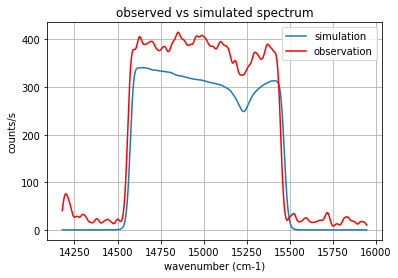

In [7]:
# the expected spectrum is computed from the standard spectrum, our knowledge of the instrument optics (sitelle + telescope) and the observation parameters. 
# It can be obtained with
print('initial resolution of the observed spectrum: ', spec.params.resolution)
print('resolution of the standard spectrum: ', np.median(spec.get_standard().params.resolution))
spec.get_standard().change_resolution(600).plot(label='simulation')
# on which we can overplot the obtained spectrum
spec.to_counts_s().change_resolution(600).plot(c='red', label='observation')
pl.legend()
pl.ylabel('counts/s')
pl.xlabel('wavenumber (cm-1)')
pl.title('observed vs simulated spectrum')
pl.grid()

/home/thomas/Astro/Python/ORB/Orb/orb/fft.py:1150: RuntimeWarning: invalid value encountered in true_divide
  residual.data /= sim.data


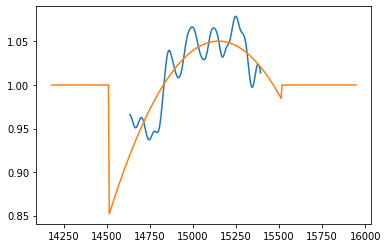

In [8]:
# the correction function is obtained via
corr, res = spec.compute_flux_correction_vector(return_residual=True)
res.plot() # residual is not a real residual but the ratio between both curves, normalized to have a mean of 1.
corr.plot() # the correction function is a polynomial fitted to this 'residual'